In [ ]:
# Catalina Savage
# AST 5263 - Advanced Observational Astronomy
# Homework 1

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import *
# from astropy import *

c:\Users\savag\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
# Problem 1

In [ ]:
# PART A

In [24]:
# formulas

# freq = c / wv, convert wavelength to frequency
# B_freq = ( 2*h*(v**3) / c**2 ) * ( 1 / np.exp(h*v/k*T_a)-1 ) # * C_a = F_a
# F_a = Bv*Ta # in terms of C_a
# F_b = Bv*Tb # in terms of C_a




# F_a = B_freq * C_a
# F_b = F_a / ratio

In [2]:
# constants
k = 1.38e-23  # Stefan-Boltzmann constant, J/K
h = 6.626e-34 # Planck's constant, J/Hz
c = 3e+8      # m/s
T_a = 2000    # Kelvin
C_a = 1       # (in proper units) THIS IS AN ASSUMPTION

In [3]:
# values
wv_a = [ 0.37, 0.44, 0.55, 0.70, 1.20, 1.60, 2.20, 3.60 ]                # star A's wavelength, microns
mg_a = [ 9.432, 7.196, 4.839, 2.832, -0.148, -1.126, -1.871, -2.410 ]    # star A's magnitude

wv_b = [ 5.00, 8.90, 9.70, 10.60, 11.70, 12.50, 18.70, 20.60 ]           # star B's wavelength, microns
mg_b = [ -2.107, -0.966, -0.822, -0.685, -0.548, -0.464, -0.069, 0.002 ] # star B's magnitude

In [4]:
# combine all wavelengths and magnitudes to their own lists cuz why not
all_wv = wv_a + wv_b
all_mg = mg_a + mg_b
print( 'all wavelength values in a list:', all_wv )
print( 'all magnitude values in a list: ', all_mg )

all wavelength values in a list: [0.37, 0.44, 0.55, 0.7, 1.2, 1.6, 2.2, 3.6, 5.0, 8.9, 9.7, 10.6, 11.7, 12.5, 18.7, 20.6]
all magnitude values in a list:  [9.432, 7.196, 4.839, 2.832, -0.148, -1.126, -1.871, -2.41, -2.107, -0.966, -0.822, -0.685, -0.548, -0.464, -0.069, 0.002]


In [5]:
# convert wavelength to frequency
# freq = c / wv

freq_a = [ c/wv for wv in wv_a ]
print( freq_a )

freq_b = [ c/wv for wv in wv_b ]
print( freq_b )

[810810810.8108108, 681818181.8181819, 545454545.4545454, 428571428.5714286, 250000000.0, 187500000.0, 136363636.36363634, 83333333.33333333]
[60000000.0, 33707865.16853932, 30927835.051546395, 28301886.79245283, 25641025.641025644, 24000000.0, 16042780.748663101, 14563106.796116503]


In [6]:
# ratio = 10**( -0.4*mg )
ratio_a = [ 10**( -0.4*mg ) for mg in mg_a ]
ratio_b = [ 10**( -0.4*mg ) for mg in mg_b ]

print( ratio_a )
print( ratio_b )

[0.00016873298906258031, 0.001323122333113371, 0.011598451211901664, 0.07365462114702309, 1.1460405911366027, 2.8209799536634286, 5.6027339479379705, 9.204495717531715]
[6.963057796029317, 2.434445183692201, 2.1320628358116562, 1.8793168168032686, 1.6565326493180184, 1.5332041990349143, 1.065614202158519, 0.9981596274917243]


In [7]:
Bfreq_a = ( 2*h*(freq_a**3) / c**2 ) * ( 1 / np.exp( h*freq_a/k*T_a )-1 )
print( 'the 16 frequency values of Star A:', Bfreq_a )
# Why doesn't this work...
# (I'm sleepy so I'm forgetting things.)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [7]:
# ...but this does?
Bfreq_a = [ (( 2*h*(freq**3) / c**2 ) * ( 1 / np.exp( h*freq/k*T_a )-1 )) for freq in freq_a ]
print( 'the 16 frequency values of Star A:', Bfreq_a )

the 16 frequency values of Star A: [-7.848696029850155e-24, -4.667073628850489e-24, -2.389541697971449e-24, -1.1590670553935862e-24, -2.300694444358217e-25, -9.706054540478191e-26, -3.7336512275485204e-26, -8.518238923831077e-27]


In [8]:
F_a = [ B_freq * C_a for B_freq in Bfreq_a ]
F_b = []

In [24]:
len_wvb = len( wv_b )
idx_b = wv_b[ i ]
print( 'Amount of wavelengths for Star B:', len_wvb )
print( 'last value in wv_b:', idx_b )
print( 'last value in wv_a:', wv_a[i] )

Amount of wavelengths for Star B: 8
last value in wv_b: 20.6
last value in wv_a: 3.6


In [15]:
for i in range( len_wvb ):
    idx_a = wv_a.index( min(wv_a, key=lambda x:abs( x - idx_b )) )
    F_b.append( F_a[idx_a] / ratio_b[i] )
    print( wv_b[i], F_b[i] )

5.0 -1.2233474392081884e-27
8.9 -3.499047331561556e-27
9.7 -3.995303881645807e-27
10.6 -4.5326252857784045e-27
11.7 -5.142210102129874e-27
12.5 -5.555841113136098e-27
18.7 -7.99373629459559e-27
20.6 -8.533944560787901e-27


In [11]:
print( F_b )

[-1.2233474392081884e-27, -3.499047331561556e-27, -3.995303881645807e-27, -4.5326252857784045e-27, -5.142210102129874e-27, -5.555841113136098e-27, -7.99373629459559e-27, -8.533944560787901e-27]


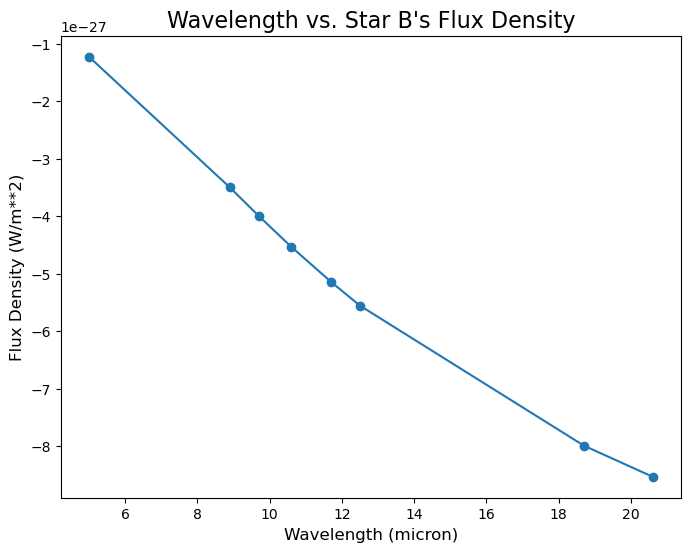

In [12]:
# PART B, LOG-LOG PLOT
# plot flux vs wavelength

plt.figure( figsize=(8,6) )
plt.plot( wv_b, F_b, marker='o' )

plt.xlabel( 'Wavelength (micron)', fontsize=12 )
plt.ylabel( 'Flux Density (W/m**2)', fontsize=12 )

plt.title( "Wavelength vs. Star B's Flux Density", fontsize=16 )

plt.show()

In [26]:
# PART C

wv_arr   = np.array( wv_a )
freq_arr = np.array( freq_a )

peak_b = [] # empty list to store with calculated Planck function temperatures for Star B

In [33]:
for idx_b in wv_b:
    if idx_b <= wv_arr[ 0 ]:
        peak_b.append( freq_arr[0] )
        # print( 'a:', freq_arr[0] )
    elif idx_b >= wv_arr[ -1 ]:
        peak_b.append( freq_arr[-1] )
        # print( 'b:', freq_arr[-1] )
    else:
        idx = np.sorted( wv_arr, idx_b )
        
        wv_0   = wv_arr[ idx - 1 ] 
        freq_0 = freq_arr[ idx - 1 ]
        
        wv_1   = wv_arr[ idx ]
        freq_1 = freq_arr[ idx ]
        
        interpolate = ( freq_0 + (freq_1-freq_0)*(idx_b-wv_0) )/ (wv_1-wv_0)
        peak_b.append( interpolate )
        # print( 'c:', interpolate )

Kelvin = [ h*c / k*peak for peak in peak_b ]


In [36]:
K_i    = Kelvin[ i ]
peak_i = peak_b[ i ]

# print( "Temperatures of the Planck functions of B's spectrum:", Kelvin )
# print( 'Peak frequencies of Star B:', peak_b )
print( "Temperature of the Planck functions of B's spectrum in Kelvins:", K_i )
print( 'Peak frequency of Star B in Hz:', peak_i )

Temperature of the Planck functions of B's spectrum in Kelvins: 1200362.3188405796
Peak frequency of Star B in Hz: 83333333.33333333


In [21]:
# if idx_b <= wv_arr[ 0 ]:
#     print( 'a:', freq_arr[0] )
# elif idx_b >= wv_arr[ 0 ]:
#     print( 'b:', freq_arr[-1] )
# else:
#     idx = np.sorted( wv_arr, idx_b )
#     # idx = np.sorted( wv_arr, x )
    
#     wv_0   = wv_arr[ idx - 1 ] 
#     freq_0 = freq_arr[ idx - 1 ]

#     wv_1   = wv_arr[ idx ]
#     freq_1 = freq_arr[ idx ]

#     interpolate = ( freq_0 + (freq_1-freq_0)*(idx_b-wv_0) )/ (wv_1-wv_0)

#     print( 'c:', interpolate )

In [ ]:

# Problem 2

In [2]:
# Problem 2, Part A

# read in data files
sol_spec = pd.read_table( 'SolarSpectrum.txt', delimiter='\t' )
jc_filt  = pd.read_table( 'Johnson-Cousin_Filters.txt', delimiter='\t' )

In [3]:
spec = pd.DataFrame( sol_spec )
filt = pd.DataFrame( jc_filt )

flux = pd.merge( spec, filt, on='Wavelength (nm)' )

In [4]:
wvl = flux[ flux.columns[0] ] # wavelength values
sol = flux[ flux.columns[1] ] # solar spectra
B   = flux[ flux.columns[3] ] # B-filter
V   = flux[ flux.columns[4] ] # V-filter

In [41]:
Bint = np.trapz( B, wvl ) # integrate B-filter flux
print( 'Flux density average (B-filter):', Bint )

Vint = np.trapz( V, wvl ) # integrate V-filter flux
print( 'Flux density average (V-filter):', Vint )

Flux density average (B-filter): 78.08123825
Flux density average (V-filter): 98.64033


In [5]:
B_int = simpson( B, wvl ) # integrate B-filter flux
print( 'Flux density average (B-filter):', B_int )

V_int = simpson( V, wvl ) # integrate V-filter flux
print( 'Flux density average (V-filter):', V_int )
# should be more accurate than np.trapz()

Flux density average (B-filter): 78.08037221527778
Flux density average (V-filter): 98.63839371329365


In [27]:
# integrate filters by solar flux density
B_sol = simpson( B, sol )
# B_sol = B * sol
print( B_sol )

0.7748493276406371


In [28]:
V_sol = simpson( V, sol )
# V_sol = V * sol
print( V_sol )

-0.23536696777302005


In [24]:
B_wvl = simpson( B_sol, wvl )
V_wvl = simpson( V_sol, wvl )

print( B_wvl, V_wvl )

135.03051467959622 181.1813987170129


In [39]:
print( "B- and V-filter average of the Sun's flux density:", B_wvl / V_wvl )
print( "B - V color of the Sun:", B_wvl - V_wvl )

B- and V-filter average of the Sun's flux density: 0.7452780232174953
B - V color of the Sun: -46.15088403741669


In [ ]:
# I spoke to my classmates and they said that the answer should be around 0.76.
# I definitely messed up my code. :(

In [ ]:
# B_wvl = np.trapz( B_sol, wvl )
# V_wvl = np.trapz( V_sol, wvl )

# print( B_wvl, V_wvl )

In [10]:
# B_avg = np.trapz( B_wvl, B_int )
# V_avg = np.trapz( V_wvl, V_int )

# print( B_avg, V_avg )

In [42]:
print( B[0] - V[0] )

-1.9e-05


In [ ]:
# Problem 3
# 3a: plot solid angle as a function of lunar phase's phase angle, alpha

In [ ]:
# might have to convert smth??
#  Date__(UT)__HR:MN       APmag   S-brt       phi  PAB-LON  PAB-LAT
# alpha = phi column, already in degrees

In [ ]:
plt.figure( figsize=(8,6) )
# plt.plot( phase_angle, solid angle )

plt.xlabel()
plt.ylabel()

plt.show()